In [3]:
# import psspy
import numpy as np
import pandas
# psspy.psseinit()

In [ ]:
sav_file_path = './DORAA_una_carga.sav'
ierr = psspy.case(sav_file_path)

load_P_data = pandas.read_csv('../LOADP_total_psse.csv')
load_Q_data = pandas.read_csv('../LOADQ_total_psse.csv')
gen_P_data = pandas.read_csv('../GENP_total_psse.csv')
gen_Q_data = pandas.read_csv('../GENQ_total_psse.csv')

# Get list of columns
columns_load_P = load_P_data.columns.tolist().remove("fecha")
columns_load_Q = load_Q_data.columns.tolist().remove("fecha")
comumns_gen_P = gen_P_data.columns.tolist().remove("fecha")
columns_gen_Q = gen_Q_data.columns.tolist().remove("fecha")

cant_datos = load_P_data.shape[0]

# Values of default loads for buses that dont have Qload
ierr, [load_numbers] = psspy.aloadint(sid=-1, flag=4, string="NUMBER")
ierr, [loads] = psspy.aloadcplx(sid=-1, flag=4, string="TOTALACT") # si P es negativa va a 0 todo
Qloads_dict = {}
for load_number, load_value in zip(load_numbers, loads):
    Qloads_dict[load_number] = load_value.imag

# Values of default gens for buses that dont have Qgen
# ierr, [machine_numbers] = psspy.amachint(sid=-1, flag=4, string="NUMBER")
# ierr, [machineIDs] = psspy.amachchar(sid=-1, flag=4, string="ID")
# ierr, [Pgen] = psspy.amachreal(sid=-1, flag=4, string="PGEN")

for index in range(cant_datos):
    for column in columns_load_P:
        Pload = load_P_data.loc[index, column]
        if column in columns_load_Q:
            Qload = load_Q_data.loc[index, column]
        else:
            Qload = Qloads_dict[column]
            Qload *= np.random.uniform(0.8, 1.2)
        ierr = psspy.load_data_3(int(column), "1", realar1=Pload, realar2=Qload)
    for column in comumns_gen_P:
        bus_number,id_gen = column.split('_')
        Pgen = gen_P_data.loc[index,column]
        if column in columns_gen_Q:
            Qgen = gen_Q_data.loc[index,column]
        else:
            Qgen = 0 # si la Q gen no esta en datos UTE poner uniforme del valor default en psse
        ierr = psspy.machine_data_2(int(bus_number), int(id_gen), realar1=Pgen, realar2=Qgen)

    # Run power flow
    ierr = psspy.fnsl()
    ierr, [voltajes,angles] = psspy.abusreal(-1,2,string=["PU","ANGLED"]) 

    # Run OPF

    # Save data in  npy file
    break

## Verificamos gen y load

In [14]:
import pandas as pd
load = pd.read_csv('../Carga Activa.csv')
load.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_26472\524031251.py:2: DtypeWarning: Columns (3,4,11,15,16,48,50,58,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  load = pd.read_csv('../Carga Activa.csv')


,Unnamed: 0,Fecha,Hora,Control,CALCULOS.000 DE TOT MED P.AV,ACORRIEN.000 ES CAR MED P.AV,ARAPEY.000 ES CAR MED P.AV,ARTIGAS.000 ES CAR MED P.AV,BIFURCAC.000 ES CAR MED P.AV,BIFURCAC.000 ES CAR MED P.AV.1,...,SOLYMAR.000 ES CAR MED P.AV,SUAREZ.000 ES CAR MED P.AV,SVAZQUEZ.000 ES CAR MED P.AV,TAC150.000 ES CAR MED P.AV,TGOMENSO.000 ES CAR MED P.AV,TRINIDAD.000 ES CAR MED P.AV,TYTRES.000 ES CAR MED P.AV,UPM2.000 ES CAR MED P.AV,VALENTIN.000 ES CAR MED P.AV,YOUNG.000 ES CAR MED P.AV
0,0,Fecha,Hora,SUMA CARGAS,DEMANDA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-03-21 00:00:00,00:00:00,995.513306517154,1062.449951171875,9.54016,2.85,9.809999,31.236240,31.236240,...,41.310001,No Data,20.700001,17.437859,2.056735,5.57550,31.130756,No Data,6.30943,No Data
2,2,2021-03-21 00:10:00,00:10:00,985.884025234729,1047.5777587890625,9.54016,2.85,9.809999,31.459021,31.459021,...,40.770000,No Data,20.160000,17.437859,2.056735,5.57550,31.130756,No Data,5.79276,No Data
3,3,2021-03-21 00:20:00,00:20:00,976.6405984349549,1035.16552734375,9.54016,2.85,9.270000,30.797832,30.797832,...,40.049999,No Data,20.160000,17.451233,2.056735,5.05386,30.539799,No Data,5.79276,No Data
4,4,2021-03-21 00:30:00,00:30:00,957.9858485646546,1023.9986572265625,9.54016,2.85,9.270000,30.599020,30.599020,...,39.509998,No Data,19.420000,16.903900,2.056735,5.05386,29.995466,No Data,5.79276,No Data


In [ ]:
for i in range(1,10):
    suma_cargas = load.loc[load['Fecha']==f'2022-0{i}-01 00:00:00'].iloc[:,5:].sum(axis=1)
    control = load.loc[load['Fecha']==f'2022-0{i}-01 00:00:00','Control']
    print('suma_cargas: ',suma_cargas.values)
    print('control: ',control.values)

In [67]:
suma_cargas = load.iloc[1:,5:].replace("No Data",0).astype(float).sum(axis=1)
control = load.loc[1:,'Control']
print('suma_cargas: ',suma_cargas.values)
print('control: ',(control.values).astype(float))
print('suma_cargas - control: ',suma_cargas.values - (control.values).astype(float))
diferencia = abs(suma_cargas.values - (control.values).astype(float))
# indice del primer valor mayor a 0.1
indice = np.where(diferencia>1)
print(indice)
# diferencia[indice-3:indice+3]



suma_cargas:  [ 995.51330652  985.88402523  976.64059843 ... 1277.74145585 1264.10503417
 1238.69086106]
control:  [ 995.51330652  985.88402523  976.64059843 ... 1277.74145585 1264.10503417
 1238.69086106]
suma_cargas - control:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -2.27373675e-13]
(array([], dtype=int64),)


In [65]:
a = load.iloc[1:,5:].replace("No Data",0).astype(float)
a = a.astype(float)
a.iloc[:,6]

1         0.000
2         0.000
3         0.000
4         0.000
5         0.000
          ...  
135500    5.031
135501    5.031
135502    5.031
135503    5.031
135504    5.031
Name: BONETEB.000 ES CAR MED P.AV, Length: 135504, dtype: float64

In [38]:
load.loc[load['Fecha']=='2022-01-01 00:00:00'].iloc[:,5:].sum(axis=1)

C:\Users\santi\AppData\Local\Temp\ipykernel_26472\2750204850.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  load.loc[load['Fecha']=='2022-01-01 00:00:00'].iloc[:,5:].sum(axis=1)


41185    1172.411919
dtype: float64

In [26]:
gen.loc[gen['Fecha']=='2022-01-01 00:00:00','CALCULOS.000 GE TOT MED P.AV']

26496    1031.728027
26497    1031.728027
Name: CALCULOS.000 GE TOT MED P.AV, dtype: object

In [16]:
gen = pd.read_csv('../GEN_total.csv')
gen

C:\Users\santi\AppData\Local\Temp\ipykernel_26472\1522911534.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,Fecha,18JULIO.060 GE EOL MED P.AV,18JULIO.060 GE PRE MED P.AV,18JULIO.060 GE TOT MED P.AV,ABRIL.030 GE SOL MED P.AV,ABRIL.030 GE TOT MED P.AV,ACIELO.000 GE INV MED P.AV,ACIELO.030 GE SOL MED P.AV,ACIELO.030 GE TOT MED P.AV,AGROLAND.015 GE EOL MED P.AV,...,TMACIEL2.030 GE EOL MED Q.AV,TSFOT.030 GE SOL MED Q.AV,UPM2.015 GE G01 MED Q.AV,UPM2.015 GE G02 MED Q.AV,UPM2.150 GE G01 MED Q.AV,UPM2.150 GE G02 MED Q.AV,VENTUS1.030 GE EOL MED Q.AV,VILLAROD.030 GE EOL MED Q.AV,VINGANO.030 GE SOL MED Q.AV,YARNEL.030 GE SOL MED Q.AV
0,2021-07-01 00:00:00,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
1,2021-07-01 00:10:00,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
2,2021-07-01 00:20:00,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
3,2021-07-01 00:30:00,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4,2021-07-01 00:40:00,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data


In [87]:
import pandas as pd
gen = pd.read_csv('../GEN_total.csv')

# Me quedo con la columna CALCULOS.000 GE TOT MED P.AV:
gen_total_calculada = gen[['CALCULOS.000 GE TOT MED P.AV']]

# La elimino del dataframe original
gen = gen.drop(columns=['CALCULOS.000 GE TOT MED P.AV'])

C:\Users\santi\AppData\Local\Temp\ipykernel_26472\1931975424.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [88]:
columns_p_tot = []
for c in gen.columns:
    if 'TOT' in c and 'P.AV' in c:
        columns_p_tot.append(c)
print(columns_p_tot)

['18JULIO.060 GE TOT MED P.AV', 'ABRIL.030 GE TOT MED P.AV', 'ACIELO.030 GE TOT MED P.AV', 'ALBISU.030 GE TOT MED P.AV', 'ALUR.030 GE TOT MED P.AV', 'APR_A.000 GE TOT MED P.AV', 'APR_B.000 GE TOT MED P.AV', 'APR_C.000 GE TOT MED P.AV', 'ARASOLAR.030 GE TOT MED P.AV', 'ARTILLER.150 GE TOT MED P.AV', 'BAYGORRI.150 GE TOT MED P.AV', 'BIOENER.030 GE TOT MED P.AV', 'BLENGIO.030 GE TOT MED P.AV', 'BONETE.013 GE TOT MED P.AV', 'BOTNIA.011 GEN TOT MED P.AV', 'CARACOLE.030 GE TOT MED P.AV', 'CASALKO.015 GE TOT MED P.AV', 'CBMOT.150 GE TOT MED P.AV', 'CENBAT.150 GE TOT MED P.AV', 'CENPAL.013 GE TOT MED P.AV', 'DICANO.030 GE TOT MED P.AV', 'DLITORAL.030 GE TOT MED P.AV', 'ECARAPE1.030 GE TOT MED P.AV', 'ECARAPE2.030 GE TOT MED P.AV', 'ECARIAS.030 GE TOT MED P.AV', 'EFLOR1.030 GE TOT MED P.AV', 'EFLOR2.030 GE TOT MED P.AV', 'EJULIETA.030 GE TOT MED P.AV', 'EKIYU.030 GE TOT MED P.AV', 'ELIBERTA.030 GE TOT MED P.AV', 'EMALD2.030 GE TOT MED P.AV', 'EMINAS1.030 GE TOT MED P.AV', 'ENGRAW.030 GE TOT MED

In [90]:
# Me quedo con las columnas de generacion total
gen = gen.loc[:,columns_p_tot]

# Sustituyo los valores 'No Data' por 0
gen = gen.replace('No Data',0)

# Convierto los valores a float
gen = gen.astype(float)



# Sumo el total por fila
gen_total_sumada= gen.sum(axis=1)

display(gen_total_calculada)
display(gen_total_sumada)

,CALCULOS.000 GE TOT MED P.AV
0,No Data
1,No Data
2,No Data
3,No Data
4,No Data
...,...
135934,297.372253
135935,288.753265
135936,277.770996
135937,282.541687


0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
             ...     
135934    3567.711906
135935    3562.166931
135936    3520.084486
135937    3506.705381
135938    3487.976094
Length: 135939, dtype: float64

In [108]:
gen.iloc[135938].sort_values(ascending=True)

PTIGRE.011 GE TOT MED P.AV        -0.175298
JACINTA.020 GE TOT MED P.AV       -0.090000
GRASOLAR.015 GE TOT MED P.AV      -0.008000
LIDERDAT.030 GE TOT MED P.AV       0.000000
LPIQUES.030 GE TOT MED P.AV        0.000000
                                   ...     
MDPLATA.150 GEN TOT MED P.AV      85.571999
CENPAL.013 GE TOT MED P.AV        96.440002
BONETE.013 GE TOT MED P.AV       143.707214
SGA500.013 GE TOT MED P.AV       911.100037
SGU500.013 GE TOT MED P.AV      1808.609985
Name: 135938, Length: 85, dtype: float64

In [107]:
columns_p_tot[gen.iloc[135938].argmax()]


'SGU500.013 GE TOT MED P.AV'

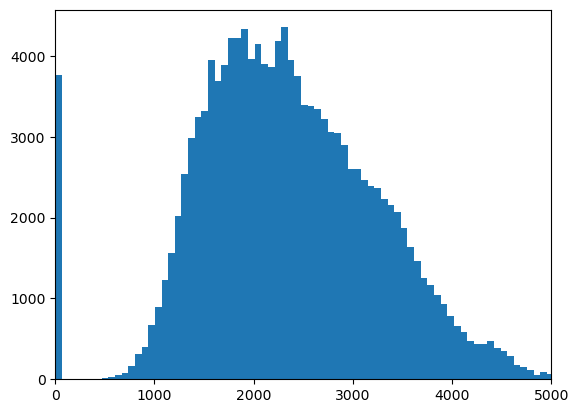

In [94]:
# Hago histograma de gen_total_sumada
import matplotlib.pyplot as plt
# Cambio el rango x entre 0 y 5000 para los bins
plt.hist(gen_total_sumada,bins=1000)
plt.xlim(0,5000)
plt.show()


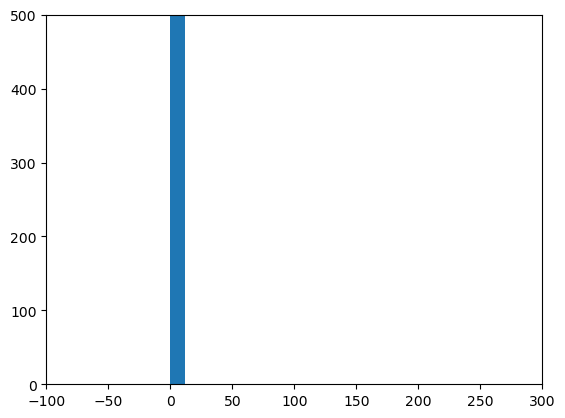

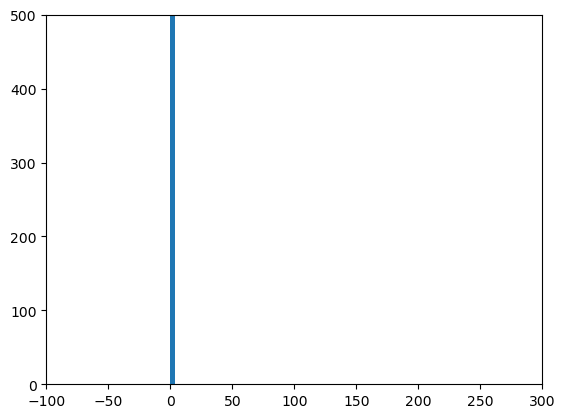

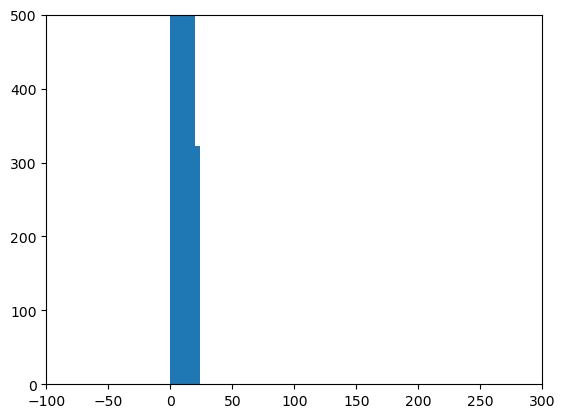

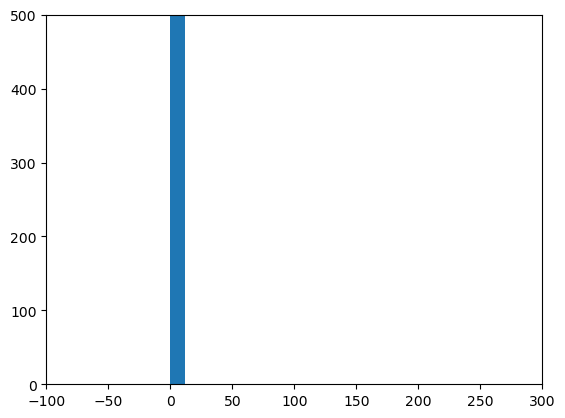

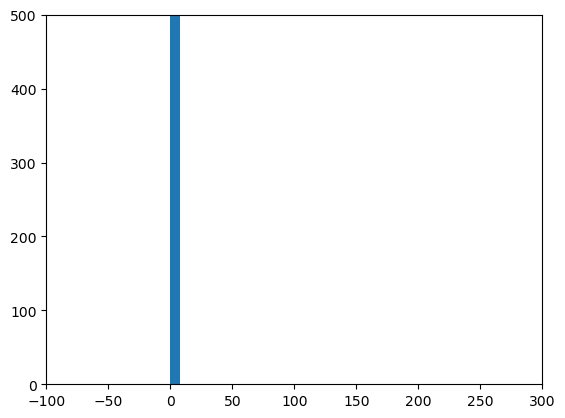

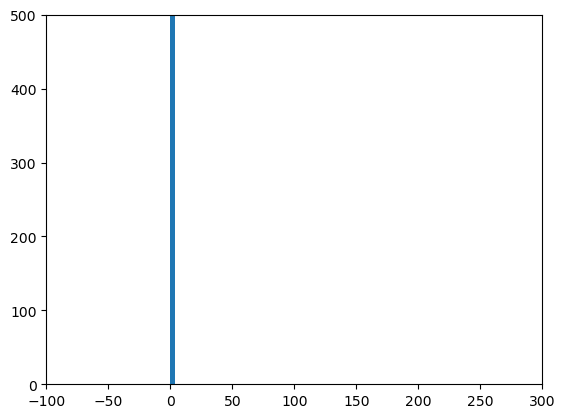

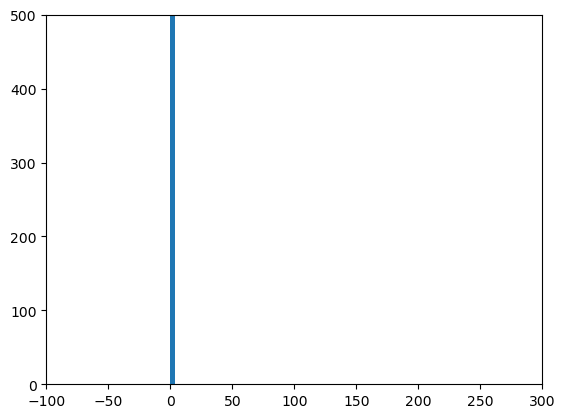

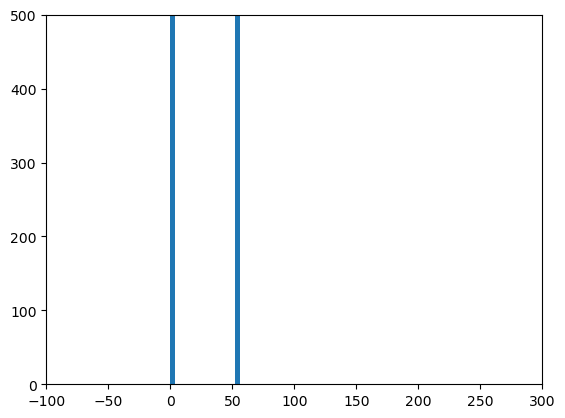

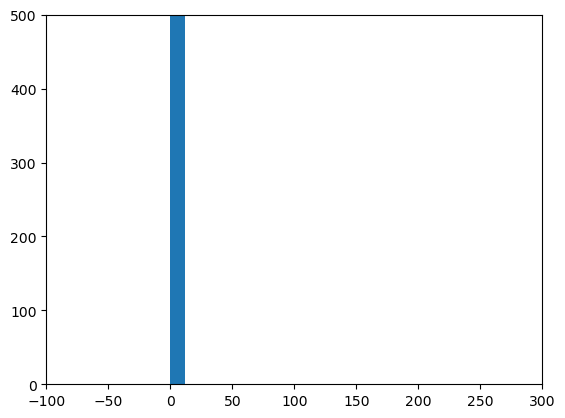

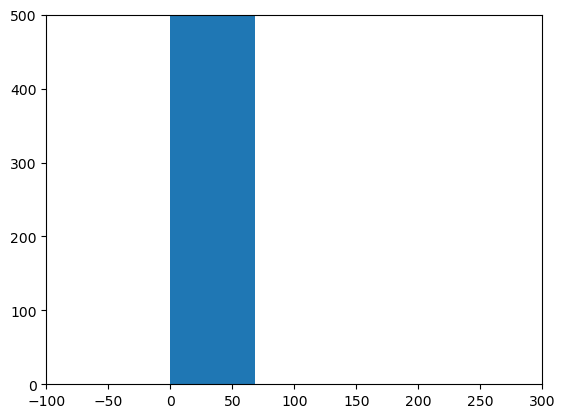

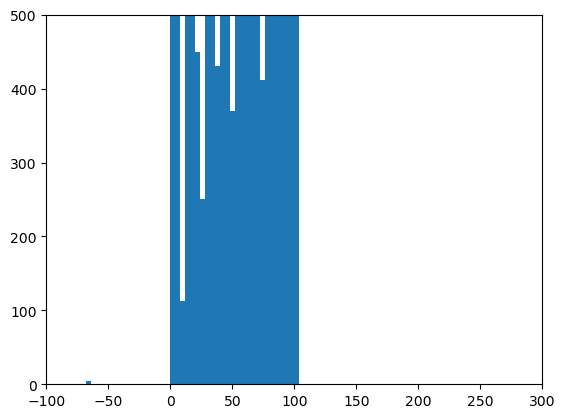

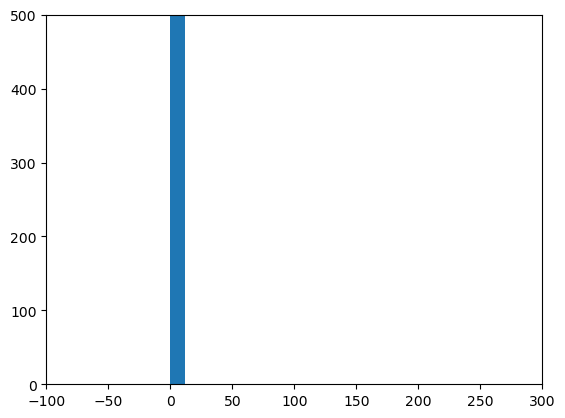

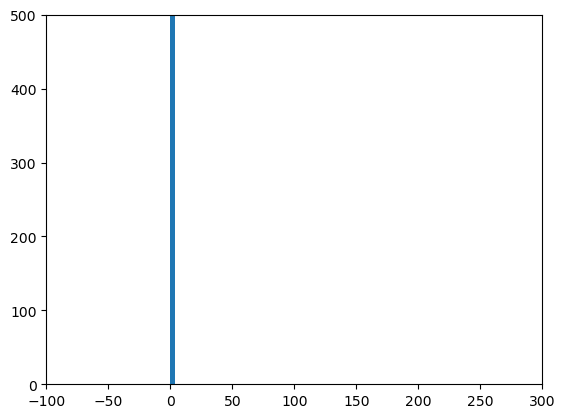

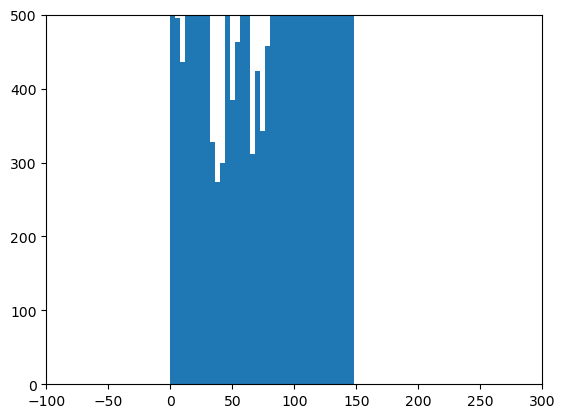

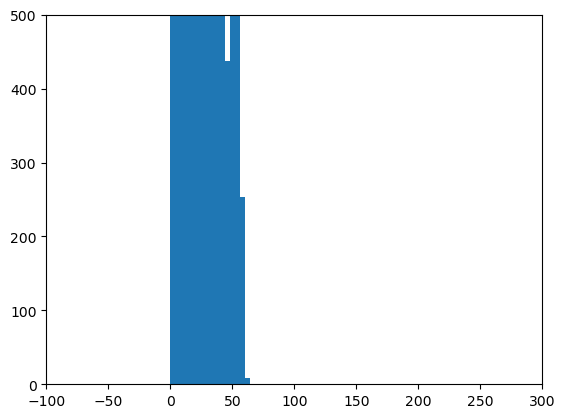

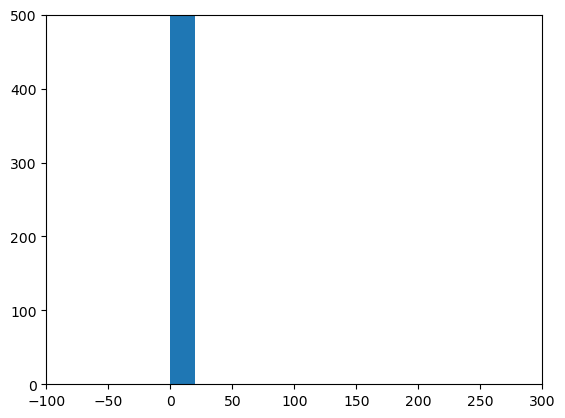

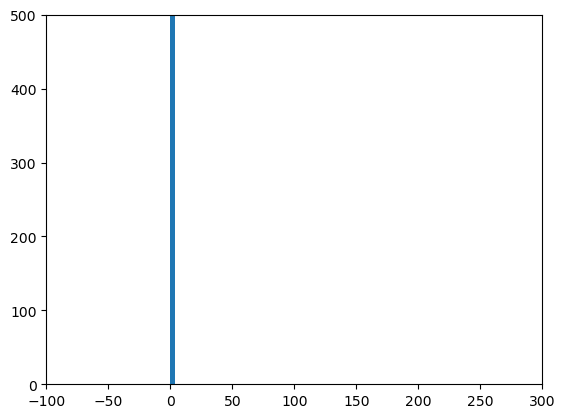

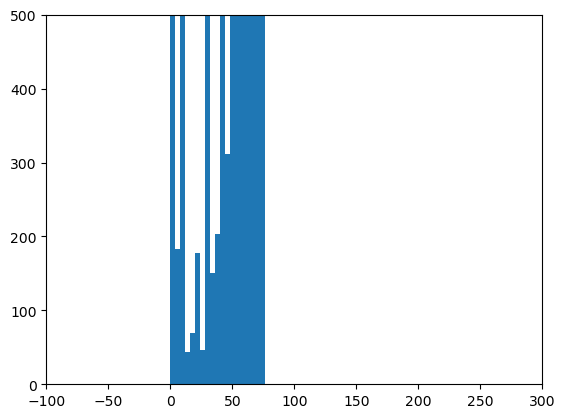

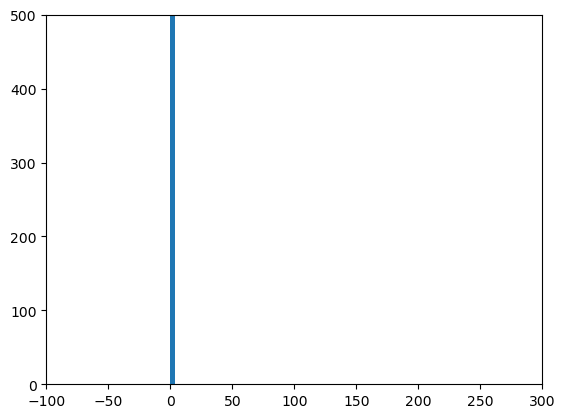

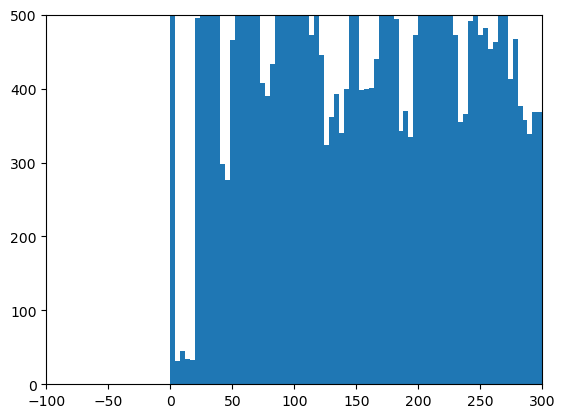

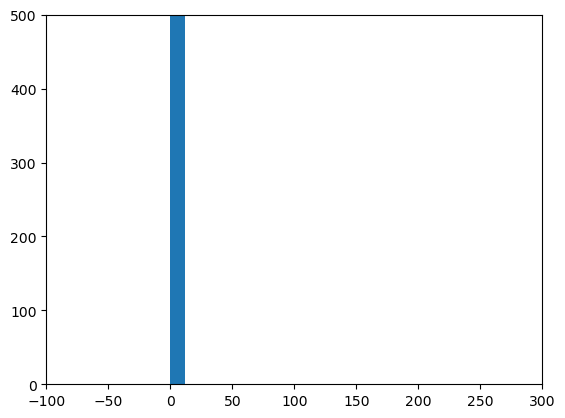

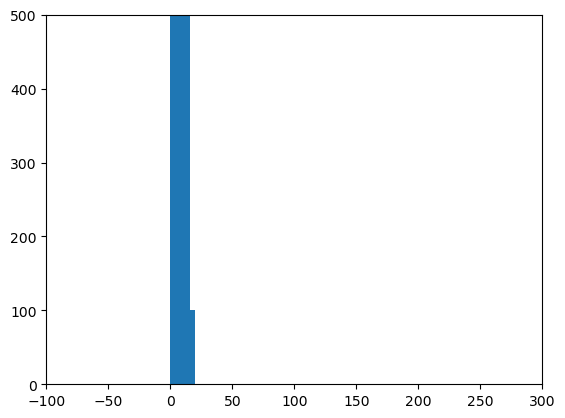

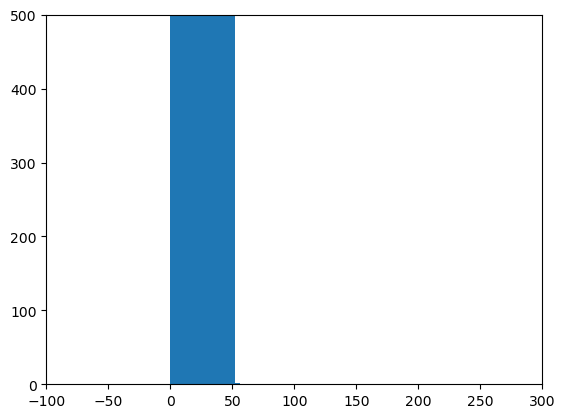

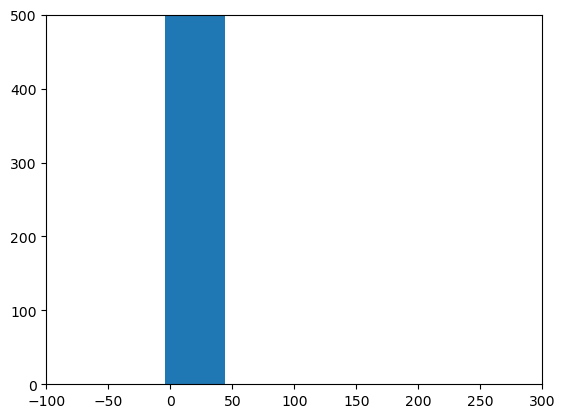

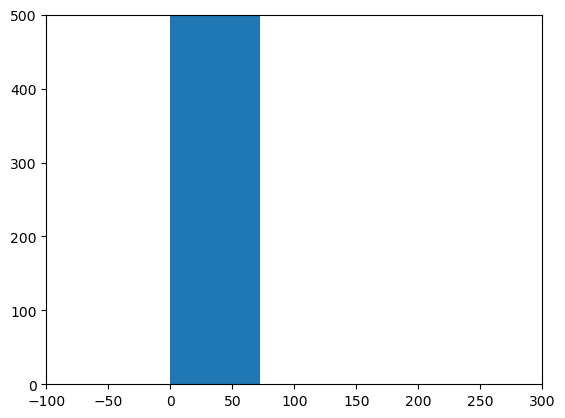

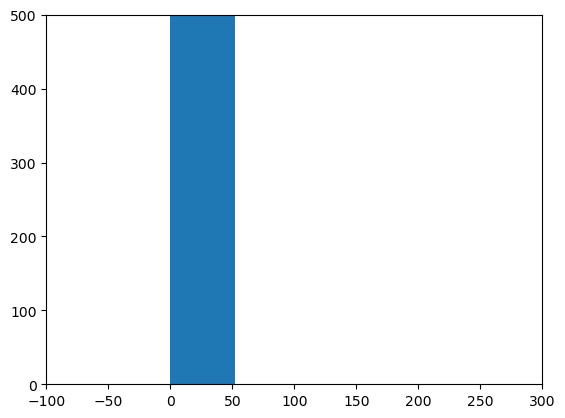

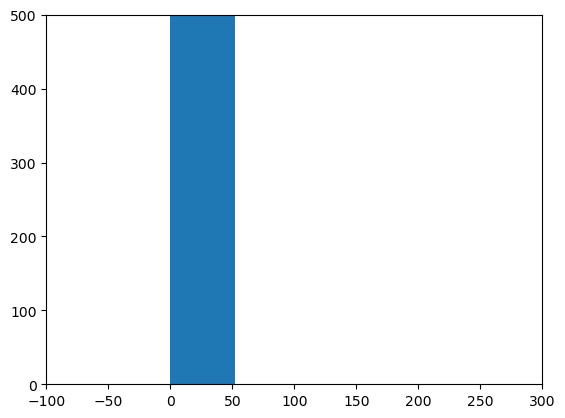

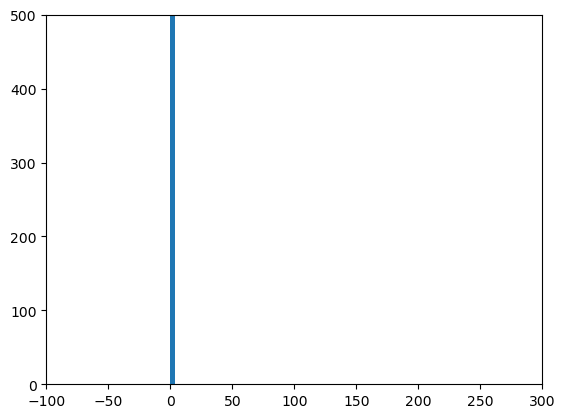

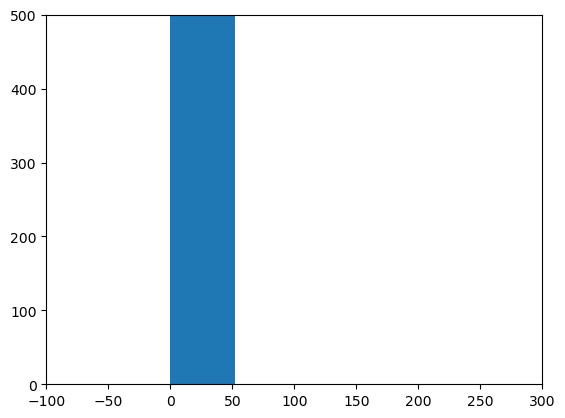

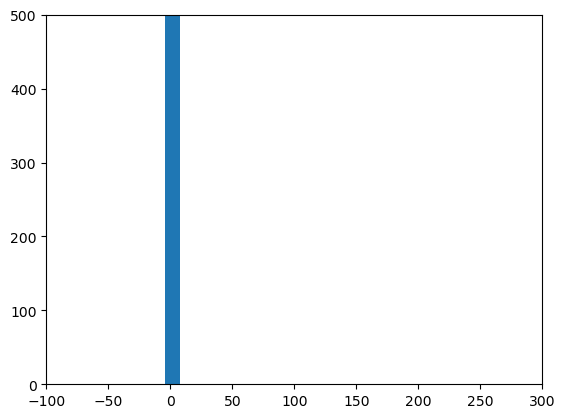

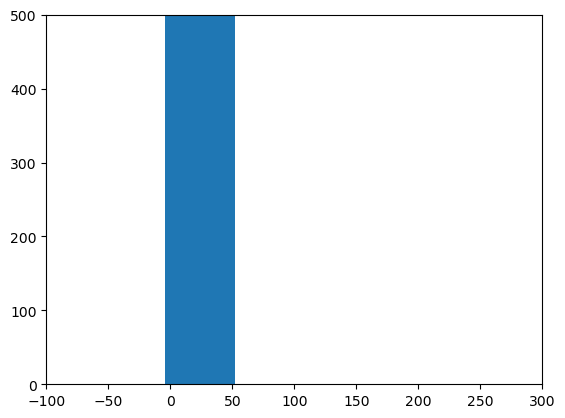

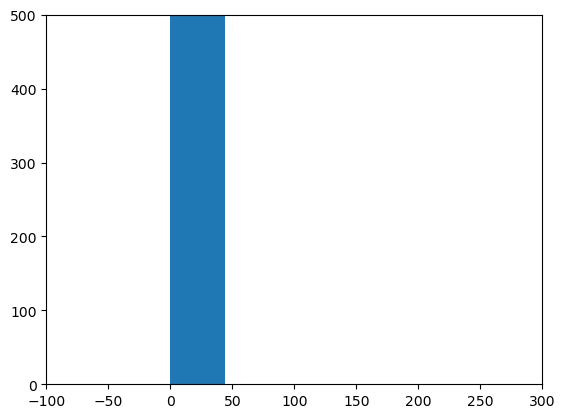

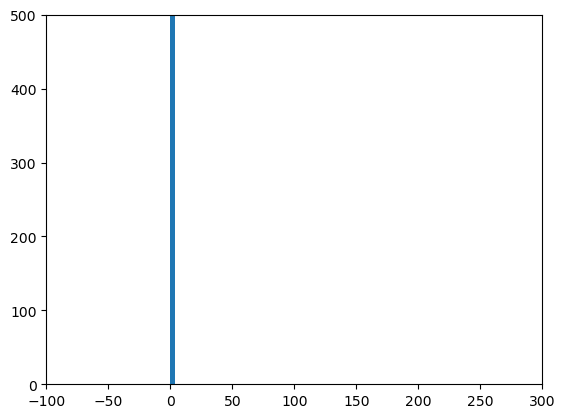

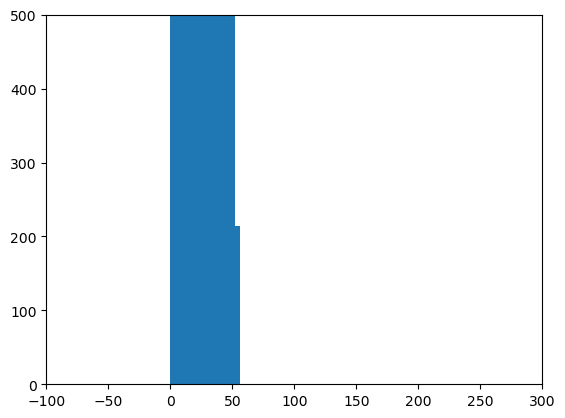

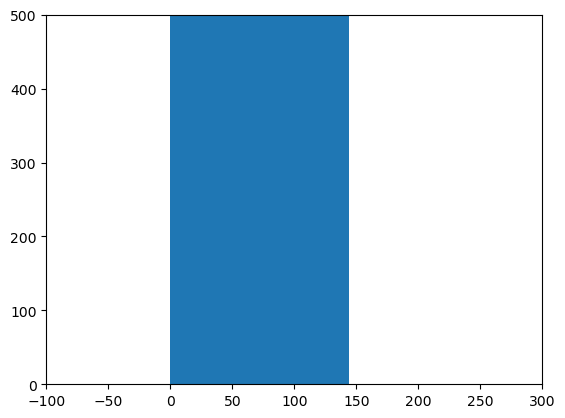

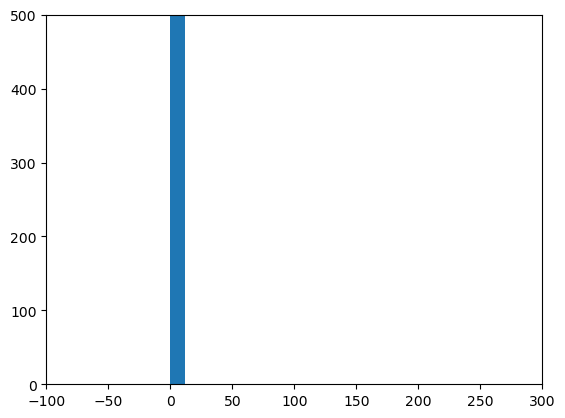

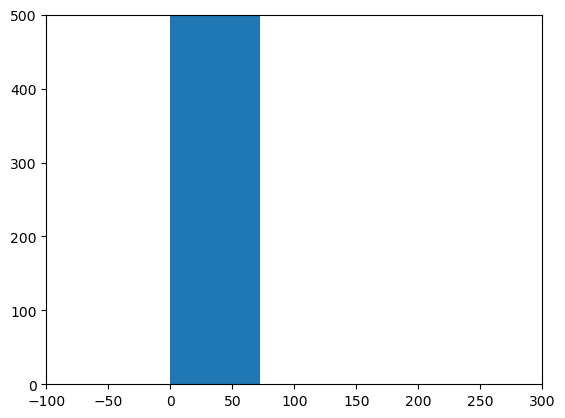

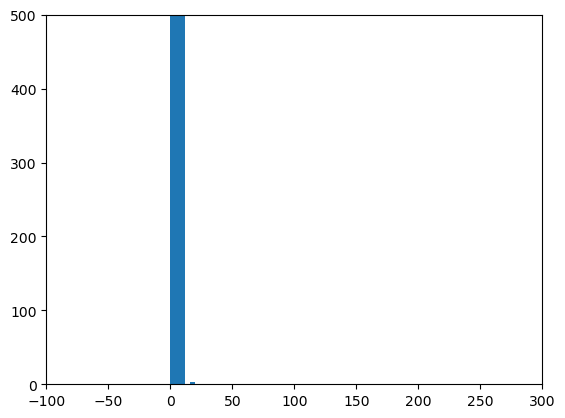

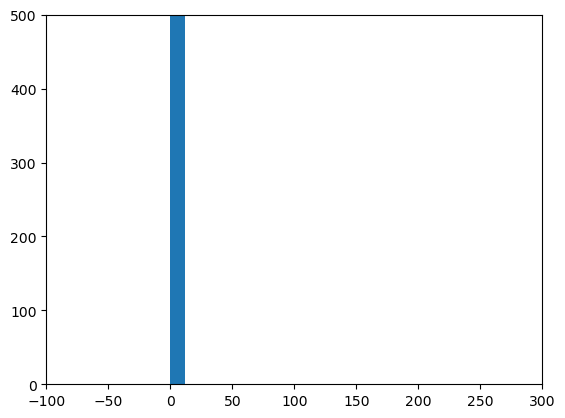

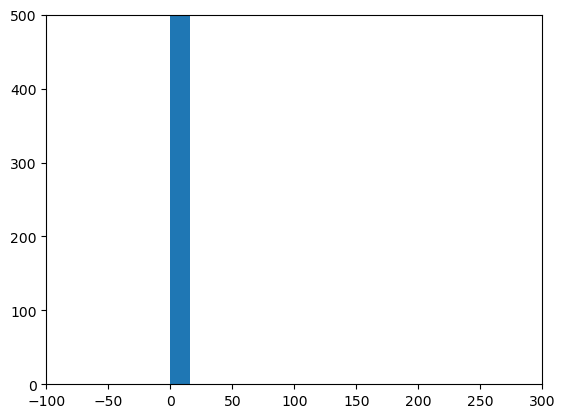

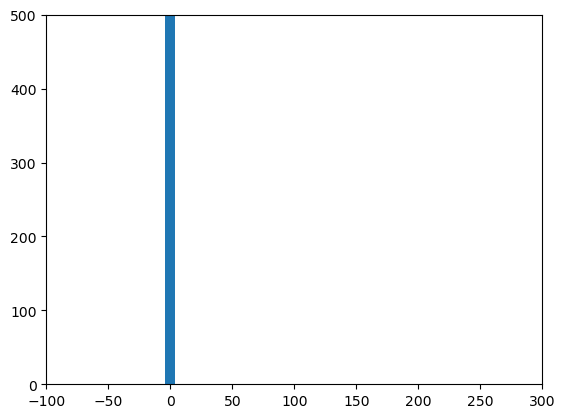

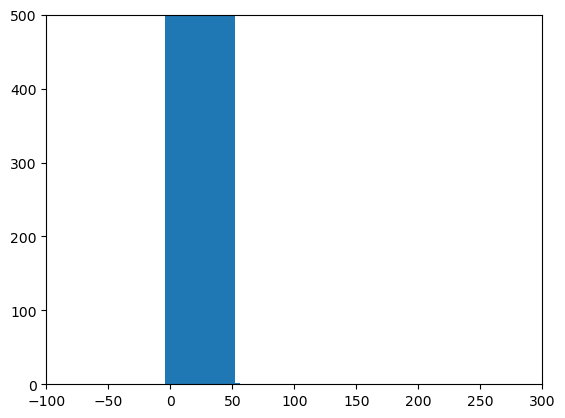

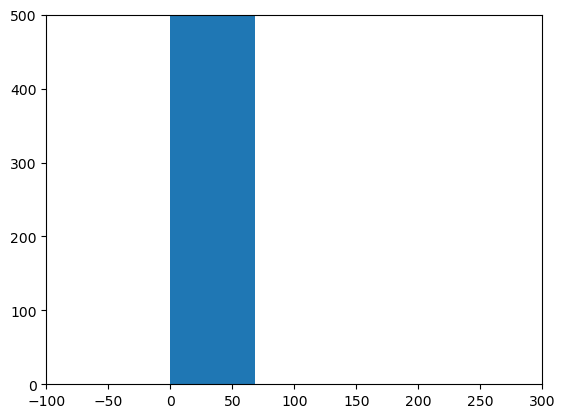

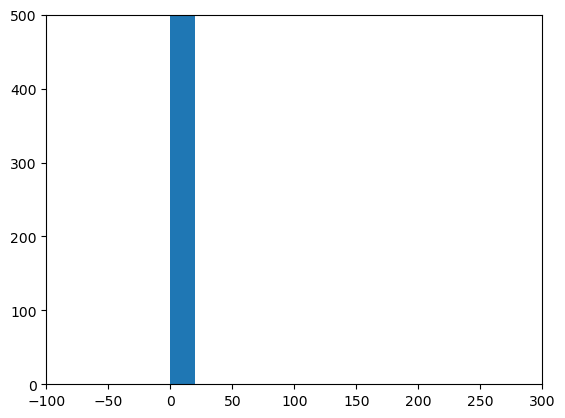

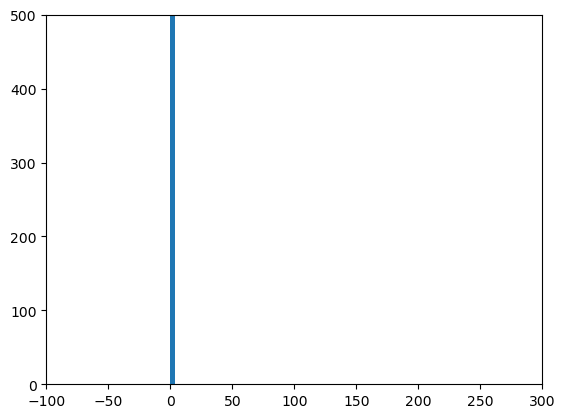

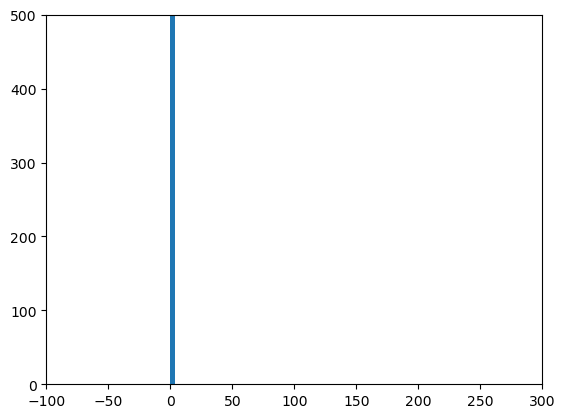

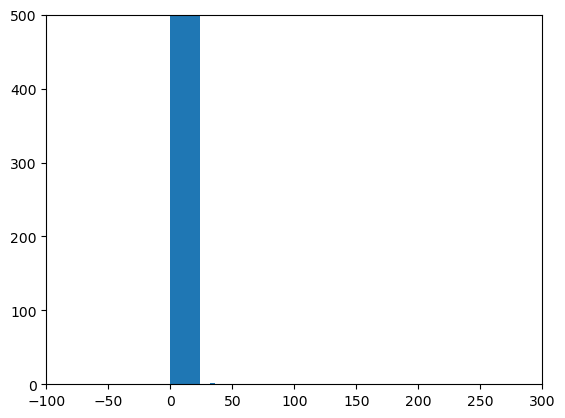

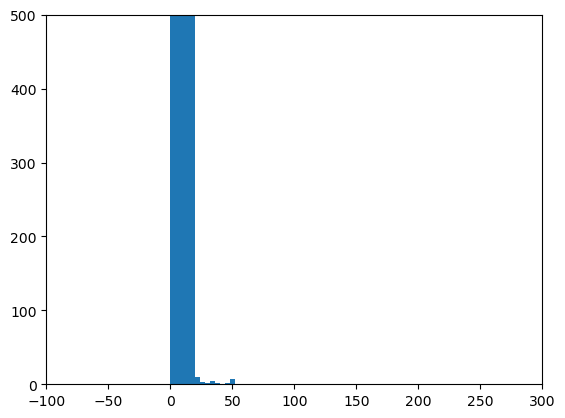

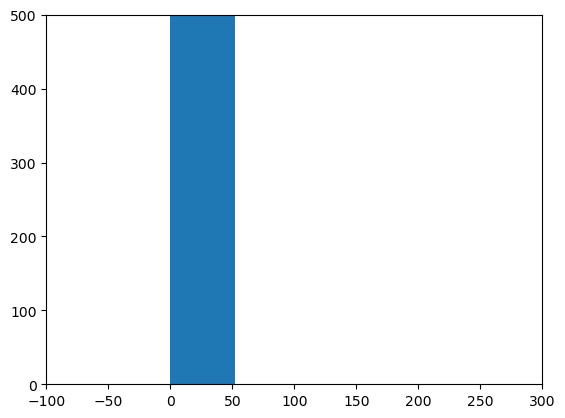

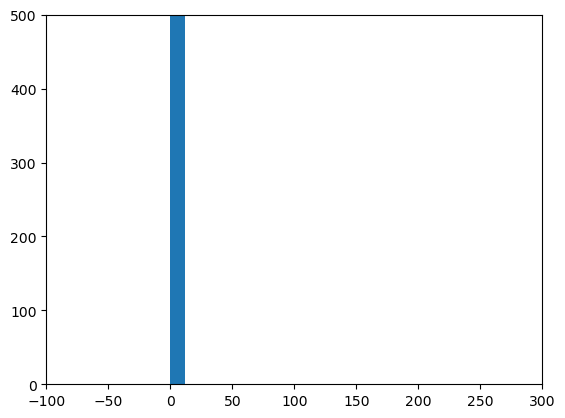

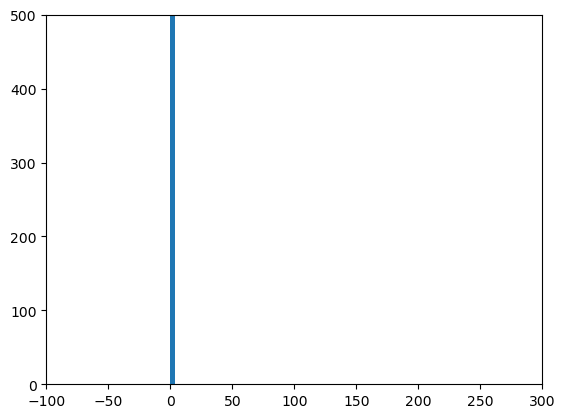

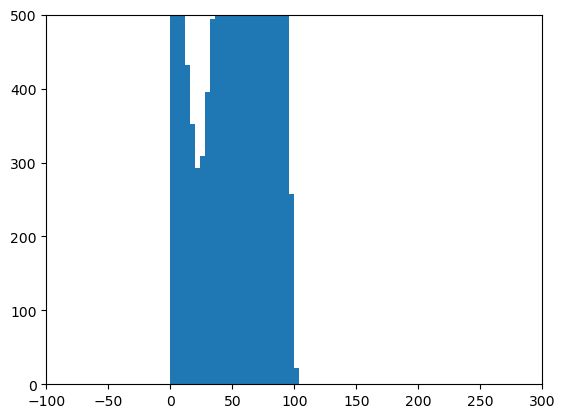

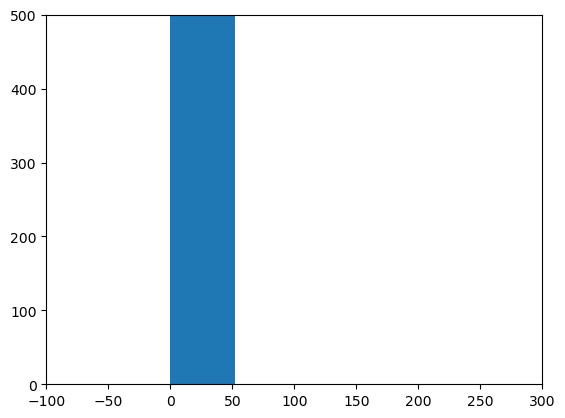

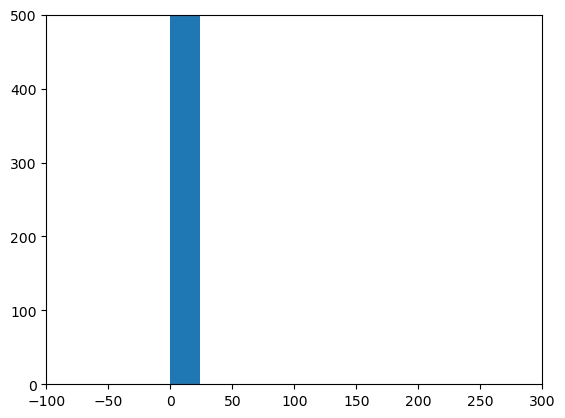

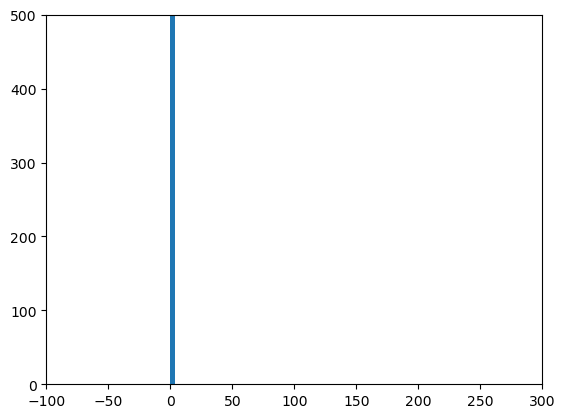

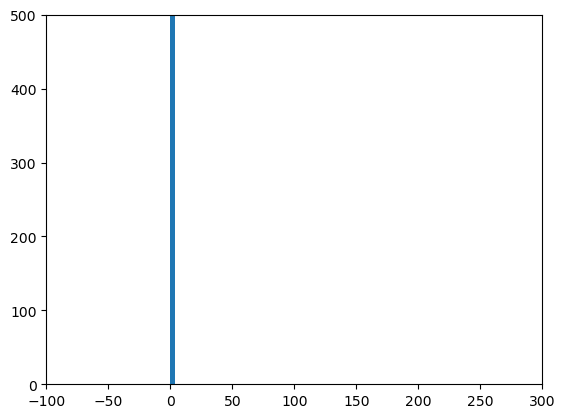

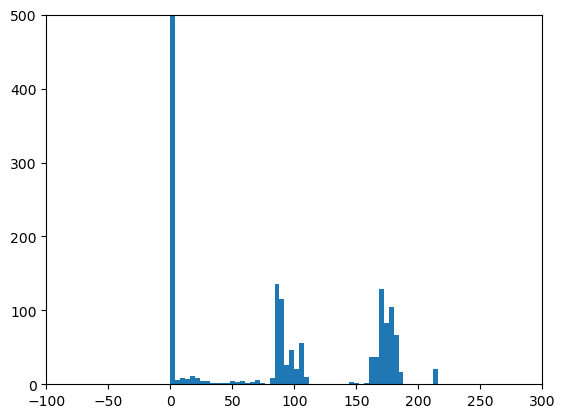

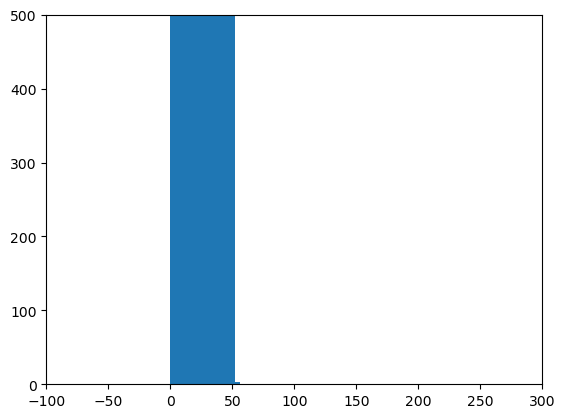

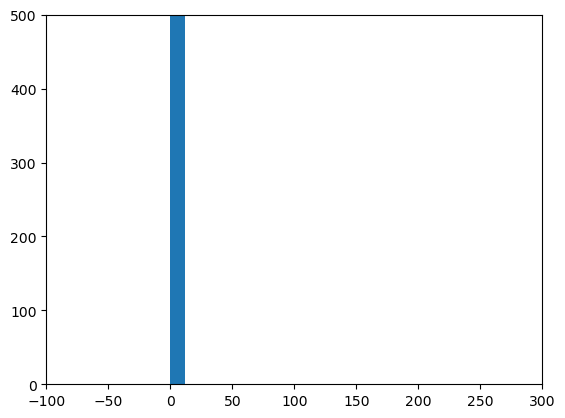

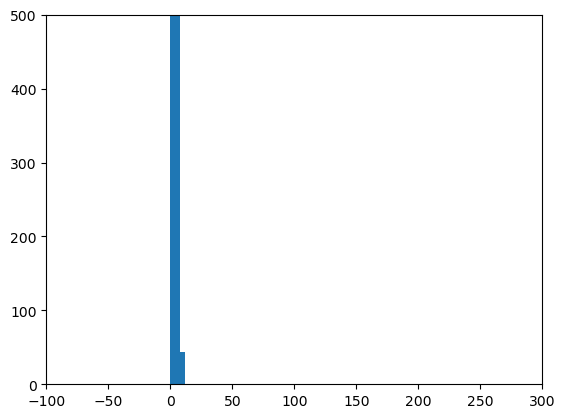

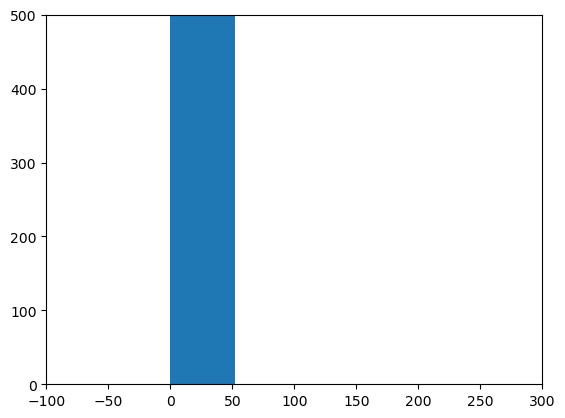

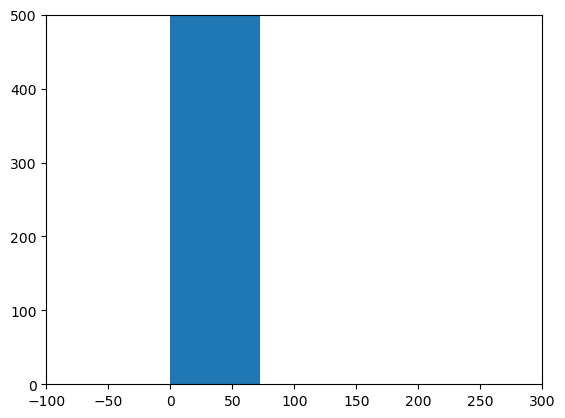

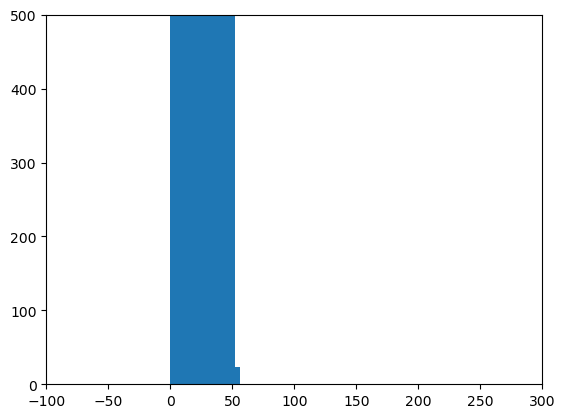

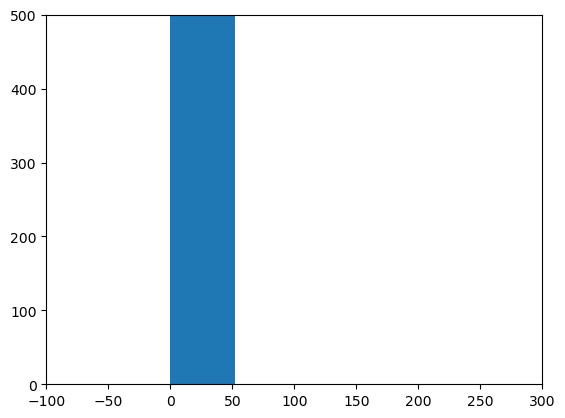

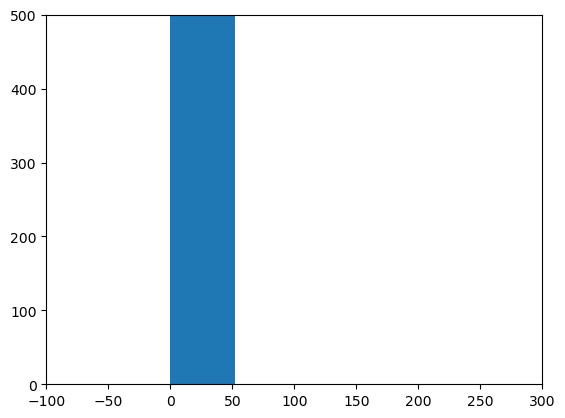

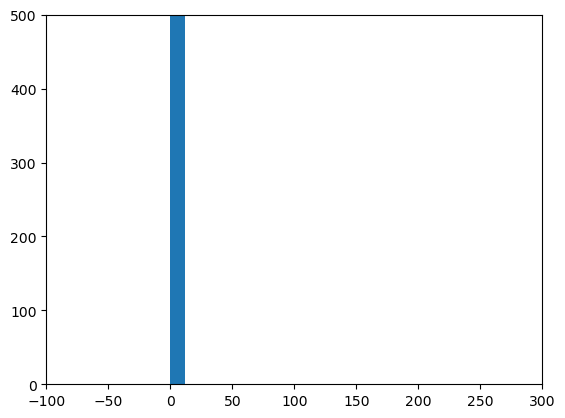

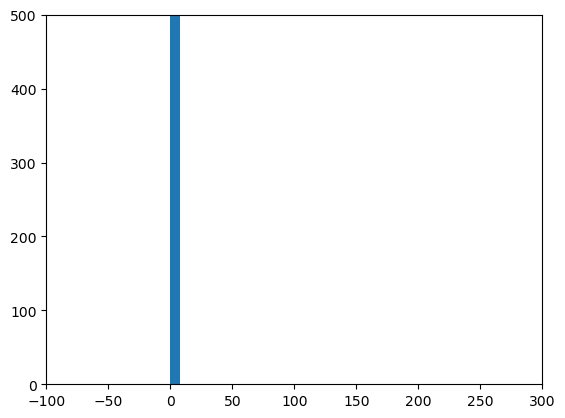

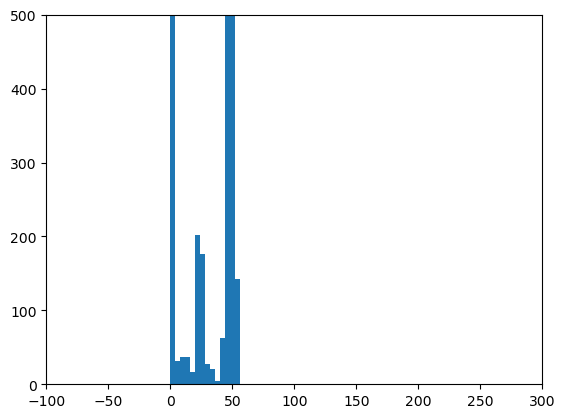

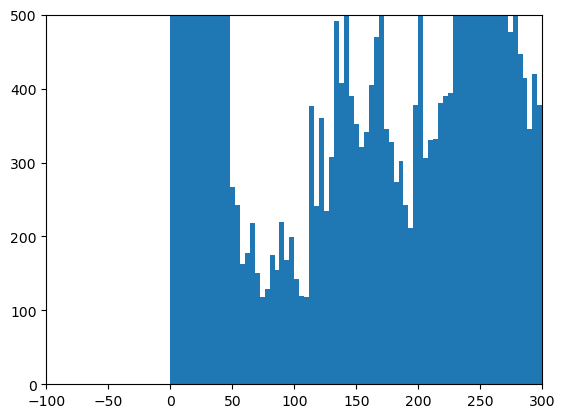

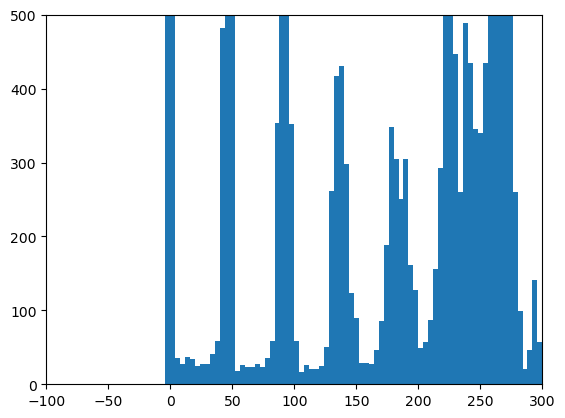

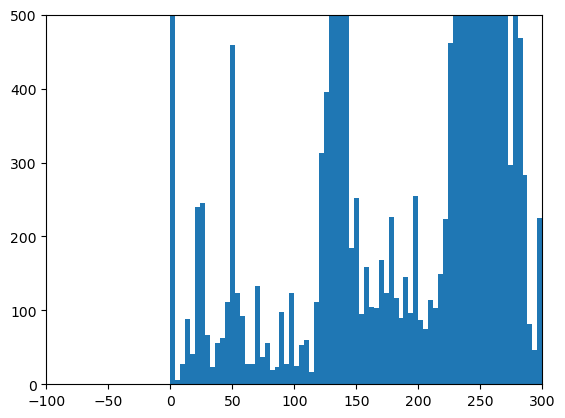

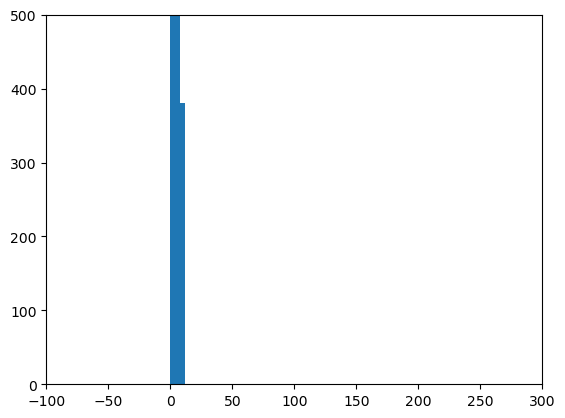

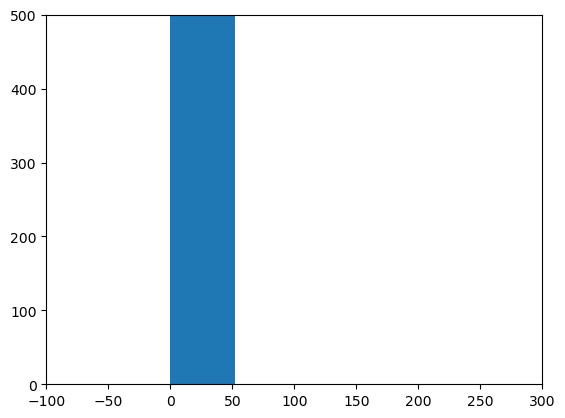

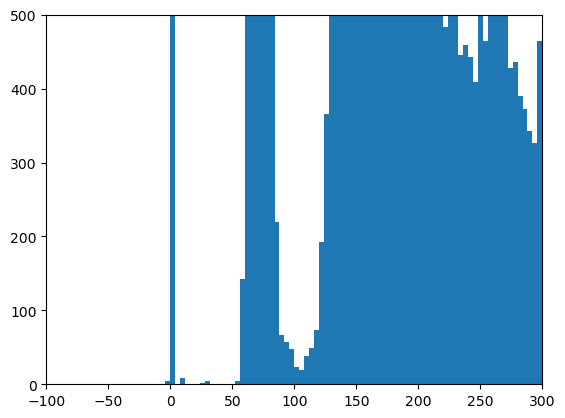

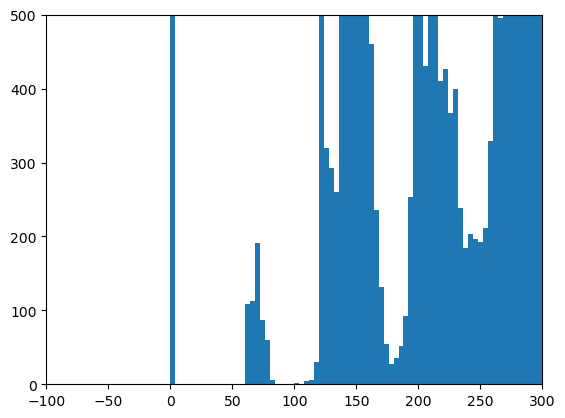

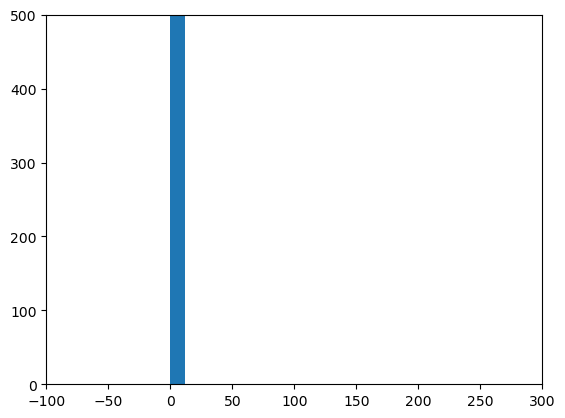

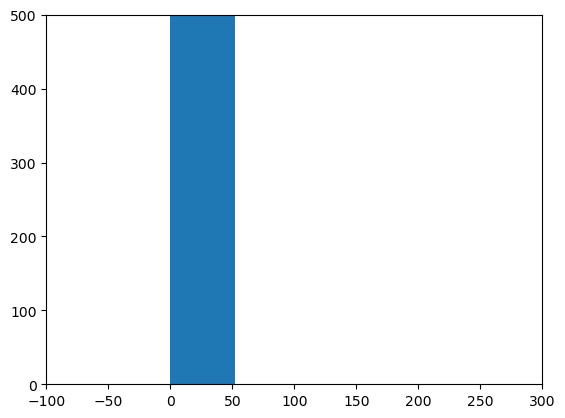

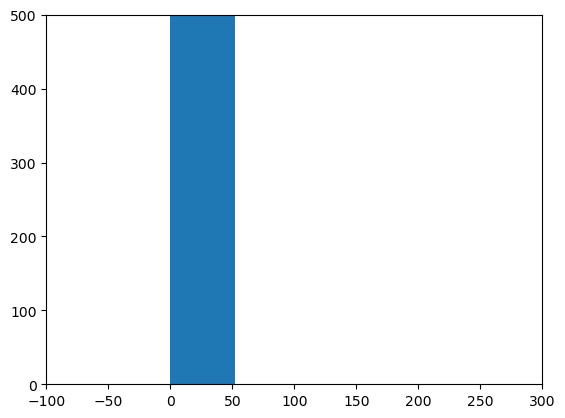

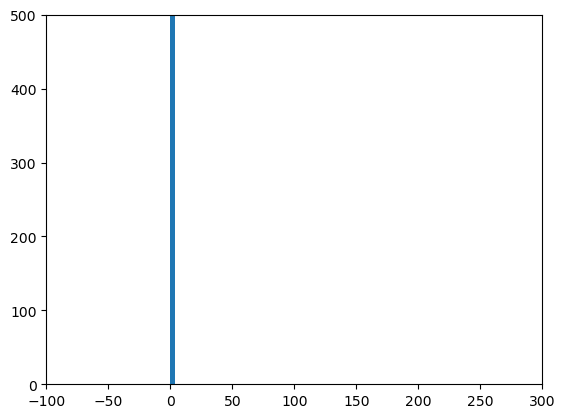

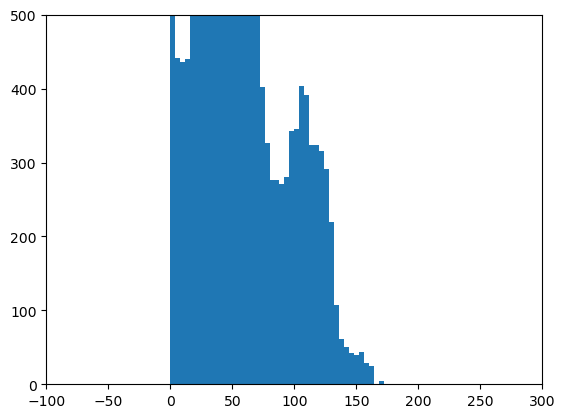

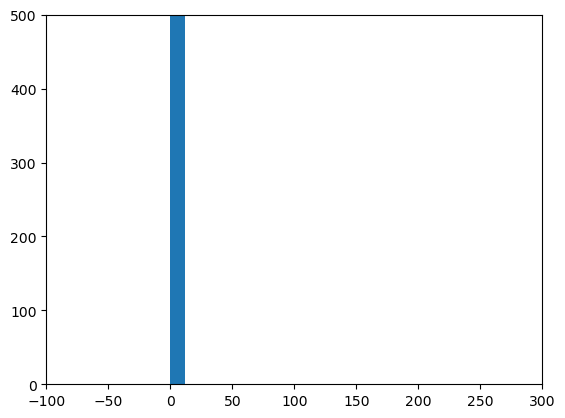

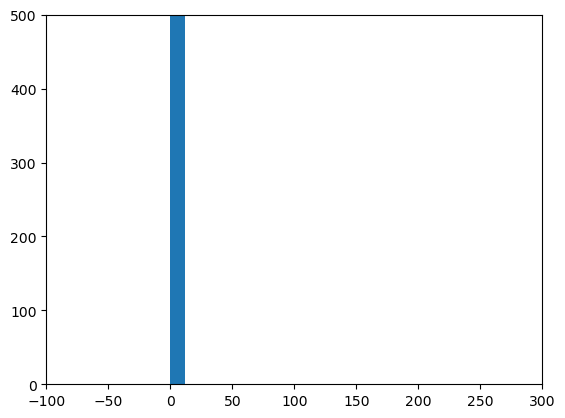

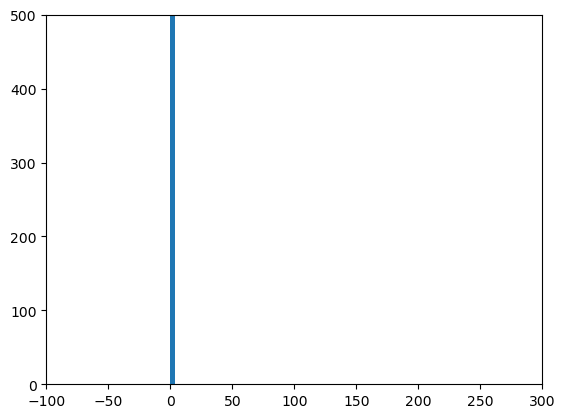

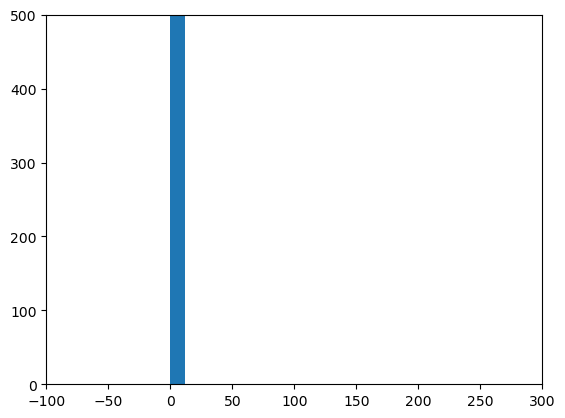

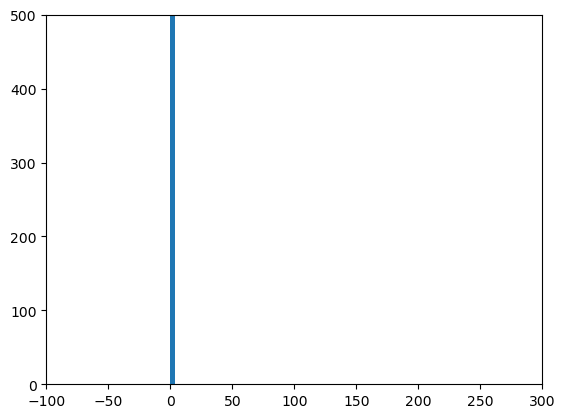

In [97]:
# Hago un histograma para cada columna de gen
for c in gen.columns:
    plt.hist(gen[c],bins=100, range=(-100,300))
    plt.xlim(-100,300)
    plt.ylim(0,500)
    plt.show()